In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing needed Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import the source file into dataframe
telecom_data= pd.read_csv("telecom_churn_data.csv")
telecom_data.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
recharge_amt= ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9']
100*telecom_data.loc[:,recharge_amt].isnull().sum()/len(telecom_data)

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

In [6]:
rech_amt_6= ['total_rech_amt_6','max_rech_amt_6','total_rech_data_6','max_rech_data_6','av_rech_amt_data_6']
telecom_data.loc[:,rech_amt_6].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,99999.000000,99999.000000,25153.000000,25153.000000,25153.000000
mean,327.514615,104.637486,2.463802,126.393392,192.600982
std,398.019701,120.614894,2.789128,108.477235,192.646318
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,109.000000,30.000000,1.000000,25.000000,82.000000
50%,230.000000,110.000000,1.000000,145.000000,154.000000
75%,437.500000,120.000000,3.000000,177.000000,252.000000
max,35190.000000,4010.000000,61.000000,1555.000000,7546.000000


In [7]:
telecom_data['goodphase_total_avg_rech_amnt'] = (telecom_data['total_rech_amt_6']+ telecom_data['total_rech_amt_7'])/2

In [8]:
filter_high_valued_cust = np.percentile(telecom_data['goodphase_total_avg_rech_amnt'] ,70)
filter_high_valued_cust

368.5

In [9]:
telecom_data = telecom_data.loc[telecom_data['goodphase_total_avg_rech_amnt'] > filter_high_valued_cust]

In [10]:
telecom_data.shape

(29979, 227)

In [11]:
telecom_data['churn']= 0

In [12]:
ls_9 = ['total_ic_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [13]:
churned_cust = (telecom_data.total_ic_mou_9 == 0) & (telecom_data.total_ic_mou_9 == 0) & (telecom_data.vol_2g_mb_9 ==0)& (telecom_data.vol_3g_mb_9 ==0)

In [14]:
telecom_data.loc[churned_cust,'churn']=1

In [15]:
telecom_data['churn'].value_counts()

0    27303
1     2676
Name: churn, dtype: int64

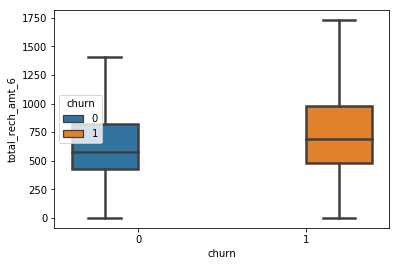

In [16]:
sns.boxplot(data=telecom_data, y= "total_rech_amt_6", x="churn",hue="churn", linewidth=2.5, showfliers=False)

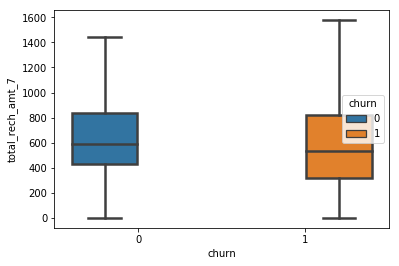

In [17]:
sns.boxplot(data=telecom_data, y= "total_rech_amt_7", x="churn",hue="churn", linewidth=2.5, showfliers=False)

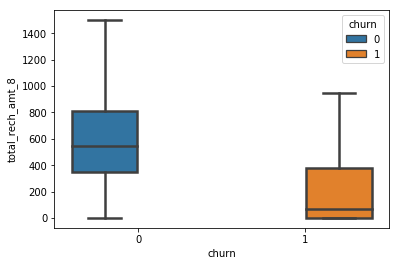

In [18]:
sns.boxplot(data=telecom_data, y= "total_rech_amt_8", x="churn",hue="churn", linewidth=2.5, showfliers=False)

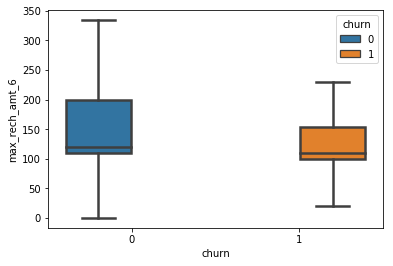

In [19]:
sns.boxplot(data=telecom_data, y= "max_rech_amt_6", x="churn",hue="churn", linewidth=2.5, showfliers=False)

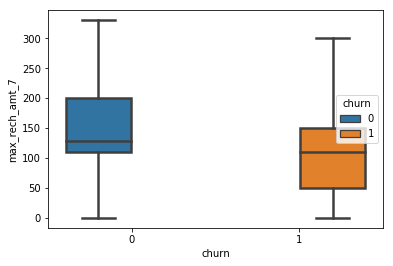

In [20]:
sns.boxplot(data=telecom_data, y= "max_rech_amt_7", x="churn",hue="churn", linewidth=2.5, showfliers=False)

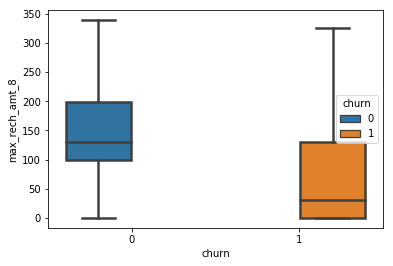

In [21]:
sns.boxplot(data=telecom_data, y= "max_rech_amt_8", x="churn",hue="churn", linewidth=2.5, showfliers=False)

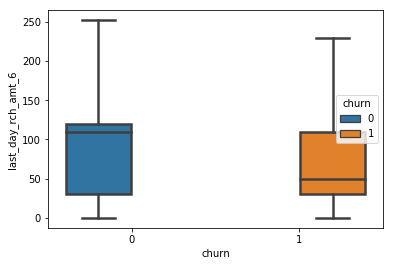

In [22]:
sns.boxplot(data=telecom_data, y= "last_day_rch_amt_6", x="churn",hue="churn", linewidth=2.5, showfliers=False)

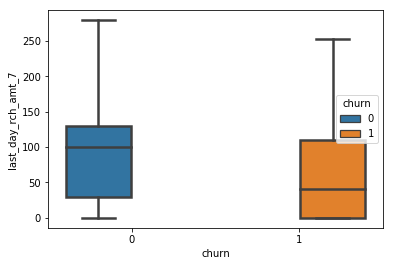

In [23]:
sns.boxplot(data=telecom_data, y= "last_day_rch_amt_7", x="churn",hue="churn", linewidth=2.5, showfliers=False)

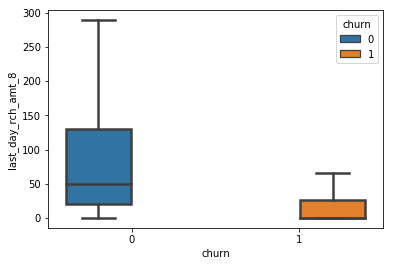

In [24]:
sns.boxplot(data=telecom_data, y= "last_day_rch_amt_8", x="churn",hue="churn", linewidth=2.5, showfliers=False)

In [25]:
columns_9= ['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9']
telecom_data.drop(columns_9,axis=1,inplace=True)

In [26]:
telecom_data.shape

(29979, 174)

In [27]:
100*telecom_data.churn.sum()/len(churned_cust)

8.926248373861704

In [28]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=98)

In [29]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,goodphase_total_avg_rech_amnt,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,NaN,1.0,1.0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,NaN,NaN,1.0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,...,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0,0


In [30]:
telecom_data.drop(['last_date_of_month_6'], axis = 1, inplace = True)
telecom_data.drop(['last_date_of_month_7'], axis = 1, inplace = True)
telecom_data.drop(['last_date_of_month_8'], axis = 1, inplace = True)
telecom_data.drop(['date_of_last_rech_6'], axis = 1, inplace = True)
telecom_data.drop(['date_of_last_rech_7'], axis = 1, inplace = True)
telecom_data.drop(['date_of_last_rech_8'], axis = 1, inplace = True)
telecom_data.drop(['date_of_last_rech_data_6'], axis = 1, inplace = True)
telecom_data.drop(['date_of_last_rech_data_7'], axis = 1, inplace = True)
telecom_data.drop(['date_of_last_rech_data_8'], axis = 1, inplace = True)
telecom_data.drop(['circle_id'], axis = 1, inplace = True)
telecom_data.drop(['mobile_number'], axis = 1, inplace = True)

In [31]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 163 entries, loc_og_t2o_mou to churn
dtypes: float64(137), int64(26)
memory usage: 38.8 MB


In [32]:
telecom_data.fillna(0, inplace = True)

In [33]:
pca.fit(telecom_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=98,
  svd_solver='randomized', tol=0.0, whiten=False)

In [34]:
pca.components_

array([[-7.79166765e-17, -0.00000000e+00,  2.22044605e-16, ...,
        -6.99888137e-04,  1.54994436e-01, -2.03868423e-06],
       [-6.33566825e-17,  1.11022302e-16,  0.00000000e+00, ...,
         5.12764664e-03,  1.66172346e-01, -1.77077655e-05],
       [ 1.04710922e-17, -1.80411242e-16, -1.11022302e-16, ...,
         6.34748477e-04,  1.17270037e-01, -3.79522386e-05],
       ...,
       [-0.00000000e+00, -1.79944648e-02,  1.64971410e-02, ...,
        -2.33103467e-17, -4.40638310e-04, -9.77307673e-17],
       [ 0.00000000e+00, -7.08325792e-01, -3.38231056e-01, ...,
        -3.19015647e-15,  2.03805213e-01,  1.49994288e-14],
       [-1.00000000e+00, -1.38384519e-25, -5.68014642e-26, ...,
        -3.84959835e-15,  5.80794936e-17,  9.82174545e-15]])

In [35]:
pcs=pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2], 
                           'PC4':pca.components_[3], 'PC5':pca.components_[4],'PC6':pca.components_[5],
                           'PC7':pca.components_[6], 'PC8':pca.components_[7], 'PC9':pca.components_[8],
                           'Feature':telecom_data.columns }).head()
pcs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-7.791668e-17,-6.335668e-17,1.047109e-17,-4.484415e-20,-1.211853e-19,-8.982827e-19,-3.754226e-19,9.528431e-20,2.725731e-20,loc_og_t2o_mou
1,-0.000000e+00,1.110223e-16,-1.804112e-16,1.350645e-16,1.080407e-16,1.422473e-16,1.518967e-16,2.385245e-17,5.408814e-17,std_og_t2o_mou
2,2.220446e-16,0.000000e+00,-1.110223e-16,4.195862e-17,-8.196568e-17,6.418477e-17,-1.240327e-16,-7.209944e-17,8.258910e-17,loc_ic_t2o_mou
3,1.145874e-01,1.310041e-01,9.327890e-02,6.603532e-02,1.725741e-01,-1.688755e-01,1.954973e-01,-1.261563e-02,1.311683e-01,arpu_6
4,1.439543e-01,1.515575e-01,9.780990e-02,6.711636e-02,7.284563e-02,6.928609e-02,2.224727e-01,-2.347206e-02,-2.457138e-01,arpu_7


In [36]:
pca.explained_variance_

array([3.13465167e+06, 2.35355102e+06, 1.38076258e+06, 8.87192948e+05,
       7.76706747e+05, 7.05490749e+05, 6.82980132e+05, 4.04578275e+05,
       3.23779882e+05, 3.02034047e+05, 2.17852748e+05, 1.93087836e+05,
       1.62426164e+05, 1.54867506e+05, 1.40391996e+05, 1.13717898e+05,
       9.43232492e+04, 8.46638009e+04, 7.94195898e+04, 6.37498236e+04,
       6.31588455e+04, 5.47946712e+04, 5.25438119e+04, 4.62770142e+04,
       4.30359576e+04, 3.79092964e+04, 3.60515571e+04, 3.39035912e+04,
       3.10216863e+04, 2.90573578e+04, 2.70770233e+04, 2.29146055e+04,
       2.11377020e+04, 2.03898998e+04, 1.74867297e+04, 1.46449221e+04,
       1.36092579e+04, 1.30361575e+04, 1.15910159e+04, 1.09241350e+04,
       1.06856344e+04, 1.04565461e+04, 9.75138520e+03, 9.23032928e+03,
       8.66886266e+03, 8.28282934e+03, 8.09848524e+03, 7.24534763e+03,
       6.35907978e+03, 6.13732417e+03, 5.77626905e+03, 5.45454999e+03,
       5.07725024e+03, 5.07464204e+03, 4.92752401e+03, 4.40248096e+03,
      

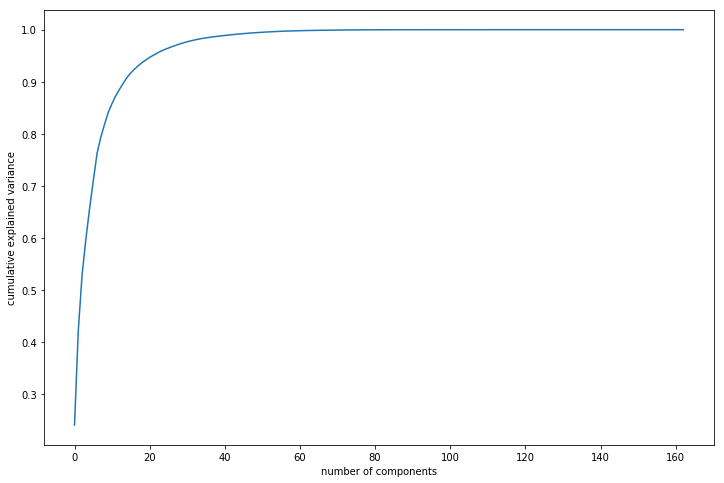

In [37]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [38]:
from sklearn.decomposition import IncrementalPCA
inc_pca = IncrementalPCA(n_components=10)

In [39]:
X_norm_pca= inc_pca.fit_transform(telecom_data)

In [40]:
X_norm_pca.shape

(29979, 10)

In [41]:
corrmat = np.corrcoef(X_norm_pca.transpose())

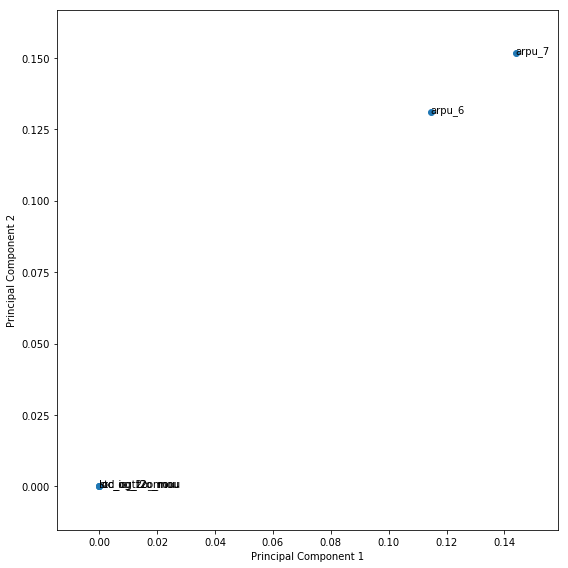

In [42]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs.PC1, pcs.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs.Feature):
    plt.annotate(txt, (pcs.PC1[i],pcs.PC2[i]))
plt.tight_layout()
plt.show()

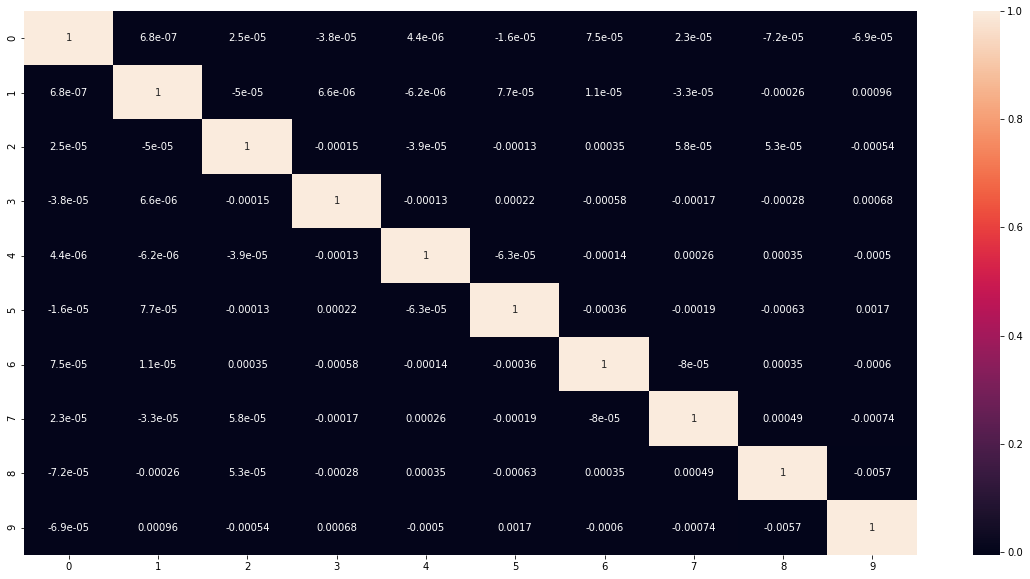

In [43]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [44]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.0016592130667518962 , min corr:  -0.005702993488415056


In [45]:
train_df = pd.DataFrame(X_norm_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [47]:
X = train_df
y = telecom_data['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [48]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [49]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
# Making predictions
predictions = rfc.predict(X_test)

In [51]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [52]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      8177
          1       0.61      0.21      0.31       817

avg / total       0.90      0.92      0.90      8994



In [53]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8070  107]
 [ 647  170]]


In [54]:
print(accuracy_score(y_test,predictions))

0.9161663331109628


In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 7

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.05 , 1:0.95})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [56]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.181829,0.030186,0.007135,0.007429,2,{'max_depth': 2},0.421807,0.428810,0.505337,0.467312,...,4,0.402535,0.431169,0.517207,0.462278,0.409829,0.423115,0.486213,0.447478,0.039422
1,0.441793,0.092655,0.005007,0.002867,7,{'max_depth': 7},0.761587,0.768590,0.768179,0.788192,...,3,0.785778,0.789503,0.787068,0.806861,0.792362,0.789026,0.787136,0.791105,0.006731
2,0.629944,0.111935,0.010950,0.003978,12,{'max_depth': 12},0.881627,0.875292,0.883256,0.892929,...,2,0.927277,0.929167,0.932173,0.924723,0.930454,0.925839,0.920669,0.927186,0.003582
3,0.799146,0.017734,0.013859,0.005767,17,{'max_depth': 17},0.912638,0.902301,0.905604,0.910941,...,1,0.971255,0.974536,0.974037,0.971313,0.974983,0.971759,0.974372,0.973179,0.001533


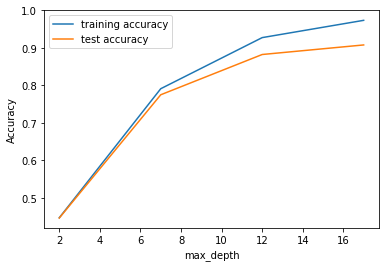

In [57]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [58]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=17, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [59]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.181829,0.030186,0.007135,0.007429,2,{'max_depth': 2},0.421807,0.428810,0.505337,0.467312,...,4,0.402535,0.431169,0.517207,0.462278,0.409829,0.423115,0.486213,0.447478,0.039422
1,0.441793,0.092655,0.005007,0.002867,7,{'max_depth': 7},0.761587,0.768590,0.768179,0.788192,...,3,0.785778,0.789503,0.787068,0.806861,0.792362,0.789026,0.787136,0.791105,0.006731
2,0.629944,0.111935,0.010950,0.003978,12,{'max_depth': 12},0.881627,0.875292,0.883256,0.892929,...,2,0.927277,0.929167,0.932173,0.924723,0.930454,0.925839,0.920669,0.927186,0.003582
3,0.799146,0.017734,0.013859,0.005767,17,{'max_depth': 17},0.912638,0.902301,0.905604,0.910941,...,1,0.971255,0.974536,0.974037,0.971313,0.974983,0.971759,0.974372,0.973179,0.001533


In [60]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 7

# parameters to build the model on
parameters = {'n_estimators': range(50, 500, 50)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                n_jobs = -1,verbose = 1 )
rf.fit(X_train, y_train)

Fitting 7 folds for each of 9 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:  4.0min finished


GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(50, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [61]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,2.347280,0.592067,0.033563,0.006272,50,{'n_estimators': 50},0.912638,0.912971,0.911941,0.912275,...,6,0.913433,0.914433,0.912326,0.914327,0.912664,0.912886,0.913442,0.913359,0.000744
1,5.720414,0.045846,0.072944,0.010292,100,{'n_estimators': 100},0.912304,0.911304,0.912608,0.912275,...,3,0.913210,0.914100,0.913215,0.913938,0.913220,0.912886,0.913776,0.913478,0.000422
2,8.531931,0.090363,0.095039,0.014902,150,{'n_estimators': 150},0.911637,0.911304,0.912275,0.912275,...,8,0.914433,0.915045,0.912548,0.913660,0.913943,0.913387,0.913943,0.913851,0.000730
3,11.308297,0.073404,0.133880,0.011863,200,{'n_estimators': 200},0.911637,0.911637,0.911608,0.912275,...,8,0.913377,0.914656,0.912882,0.914105,0.914276,0.913442,0.913720,0.913780,0.000561
4,13.610545,0.547024,0.162992,0.011487,250,{'n_estimators': 250},0.911637,0.911304,0.911941,0.912608,...,4,0.913933,0.914545,0.912492,0.913326,0.914332,0.913776,0.914054,0.913780,0.000638


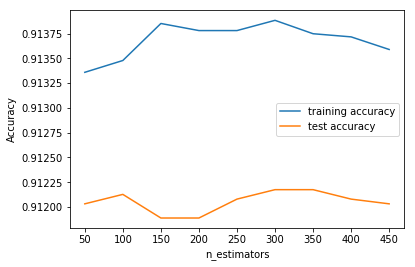

In [62]:

plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [63]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 7

# parameters to build the model on
parameters = {'max_features': [2, 4, 6, 8, 10]}

# instantiate the model
rf = RandomForestClassifier(max_depth=8)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [64]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.388340,0.057784,0.006383,0.005454,2,{'max_features': 2},0.913638,0.909637,0.917278,0.915610,...,5,0.927388,0.930502,0.930783,0.928004,0.928452,0.930342,0.927507,0.928997,0.001381
1,0.810654,0.009687,0.006711,0.007749,4,{'max_features': 4},0.914638,0.911304,0.913943,0.914610,...,1,0.934949,0.935394,0.936621,0.936621,0.936291,0.937625,0.935123,0.936089,0.000901
2,1.188360,0.012575,0.006699,0.007735,6,{'max_features': 6},0.912638,0.909637,0.913609,0.913609,...,4,0.939509,0.940620,0.939623,0.939456,0.939904,0.938014,0.937569,0.939242,0.000993
3,1.576380,0.014419,0.009104,0.007894,8,{'max_features': 8},0.913304,0.911637,0.915610,0.912608,...,3,0.941677,0.940843,0.939567,0.939289,0.941850,0.941906,0.939960,0.940728,0.001040
4,1.955988,0.014465,0.002232,0.005468,10,{'max_features': 10},0.916639,0.913971,0.914943,0.915277,...,2,0.941065,0.940176,0.940513,0.940846,0.941572,0.940627,0.939793,0.940656,0.000540


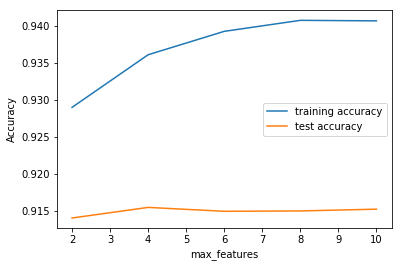

In [65]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [66]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 7

# parameters to build the model on
parameters = {'min_samples_split': range(100, 400, 20)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(100, 400, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [67]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.737784,0.155297,0.007839,0.002608,100,{'min_samples_split': 100},0.917973,0.912304,0.917612,0.914276,...,1,0.924664,0.923774,0.925001,0.923445,0.924894,0.922671,0.922170,0.923803,0.001031
1,0.605176,0.051072,0.007222,0.002004,120,{'min_samples_split': 120},0.913304,0.911637,0.917945,0.915277,...,2,0.923218,0.921050,0.922333,0.922110,0.921837,0.921726,0.920503,0.921825,0.000814
2,0.834534,0.144428,0.006759,0.006399,140,{'min_samples_split': 140},0.914305,0.909303,0.917278,0.915277,...,3,0.921439,0.920271,0.920498,0.920387,0.920002,0.919891,0.918279,0.920110,0.000881
3,0.781939,0.172149,0.009862,0.005876,160,{'min_samples_split': 160},0.913304,0.913971,0.915610,0.914610,...,4,0.918214,0.919938,0.917941,0.918108,0.918501,0.920947,0.916667,0.918616,0.001302
4,0.576770,0.045958,0.006590,0.002007,180,{'min_samples_split': 180},0.914305,0.909637,0.914610,0.914943,...,6,0.920105,0.917436,0.915328,0.916940,0.917501,0.917389,0.917056,0.917393,0.001307


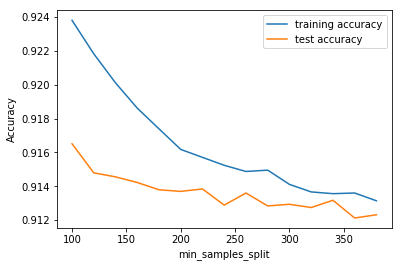

In [68]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [69]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 7

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 260, 20)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 260, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [70]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.586682,0.133997,0.007461,0.004365,100,{'min_samples_leaf': 100},0.912638,0.910970,0.913609,0.913943,...,1,0.913933,0.914600,0.913104,0.913437,0.914109,0.913053,0.913887,0.913732,0.000521
1,0.621715,0.032630,0.008364,0.005657,120,{'min_samples_leaf': 120},0.913971,0.910303,0.911941,0.912275,...,1,0.914100,0.914267,0.912882,0.913549,0.914387,0.913609,0.913609,0.913772,0.000482
2,0.637714,0.015295,0.008021,0.006898,140,{'min_samples_leaf': 140},0.913638,0.910303,0.912608,0.912608,...,1,0.912376,0.913488,0.912770,0.912993,0.912998,0.913387,0.912831,0.912978,0.000349
3,0.623717,0.024639,0.007092,0.007917,160,{'min_samples_leaf': 160},0.914305,0.911637,0.912275,0.910607,...,5,0.912376,0.912988,0.911992,0.912770,0.911385,0.912720,0.912275,0.912358,0.000505
4,0.595678,0.015431,0.010657,0.006850,180,{'min_samples_leaf': 180},0.912971,0.911637,0.912275,0.913276,...,4,0.912432,0.912487,0.912826,0.913326,0.912164,0.911552,0.911385,0.912310,0.000632


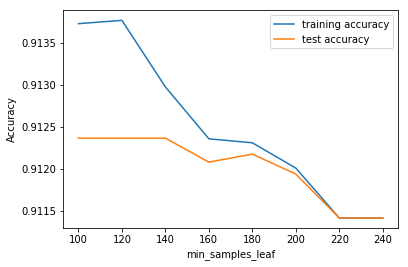

In [71]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [72]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 8, 15],
    'min_samples_leaf': [50, 100, 200],
    'min_samples_split': [50, 100, 200],
    'n_estimators': [10, 50, 100], 
    'max_features': [4, 6, 10]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [73]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 23.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [5, 8, 15], 'min_samples_leaf': [50, 100, 200], 'min_samples_split': [50, 100, 200], 'n_estimators': [10, 50, 100], 'max_features': [4, 6, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [74]:
print('Accuracy using',grid_search.best_params_, 'is', grid_search.best_score_)

Accuracy using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 50} is 0.9157493447700739


In [75]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=50,
                             class_weight={0:0.05 , 1:0.95}
                            )

In [76]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=8, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [77]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      8177
          1       0.61      0.21      0.31       817

avg / total       0.90      0.92      0.90      8994



In [79]:
X = telecom_data.drop('churn', 1)
y = telecom_data['churn']

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Lasso
from  sklearn import *
# linear regression
lm = LinearRegression()
lm.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
selcol=X.columns[lm.coef_>0]
selcoff=lm.coef_[lm.coef_>0]

sort_key=np.argsort(selcoff)
#sorting col names asc
sort_selcol=list(selcol[sort_key])
sort_selcol.reverse()
sorted_selcoff=sorted(selcoff, reverse = True)
print ('Most important features:')
for x,y in zip(sort_selcol[:15],sorted_selcoff[:15]):
    print(x)

Most important features:
loc_ic_t2o_mou
total_rech_amt_6
total_rech_amt_7
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_og_t2c_mou_7
count_rech_2g_8
std_ic_t2o_mou_8
count_rech_2g_6
count_rech_3g_8
count_rech_2g_7
monthly_3g_6
sachet_3g_6
sachet_3g_8
monthly_3g_8


In [81]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [82]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin/'

0.938857200040028


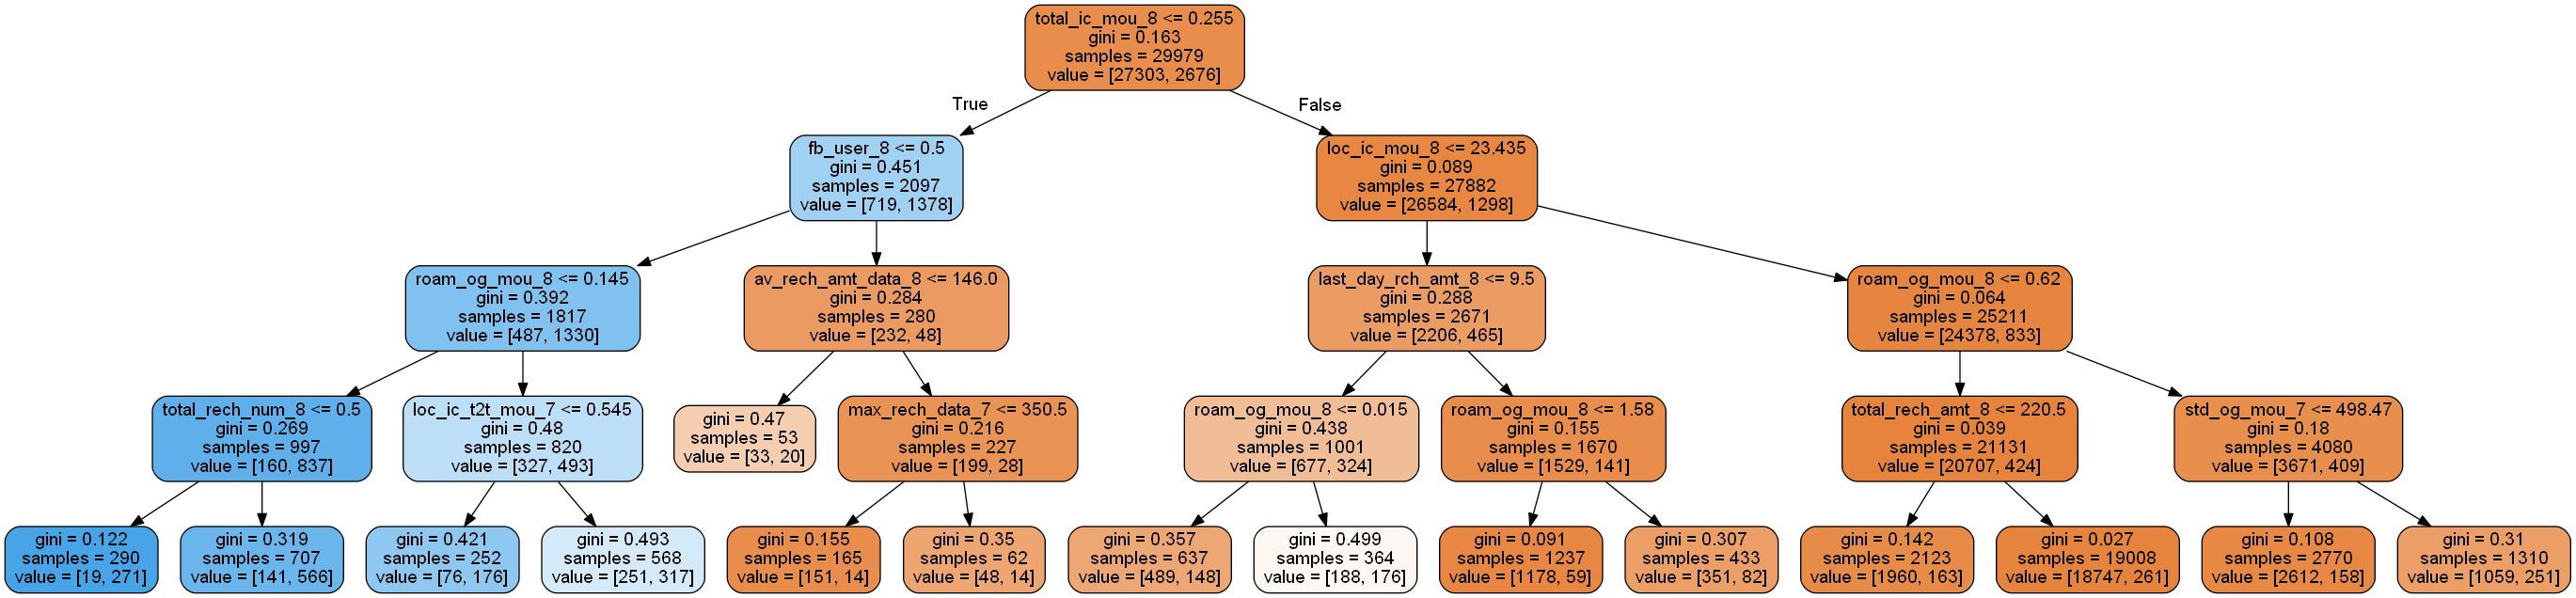

In [83]:
X = telecom_data.drop('churn', 1)
y = telecom_data['churn']

tree = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
tree.fit(X,y)

# score
print(tree.score(X,y))
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,feature_names=X.columns,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
